# Relatório de análise I

## Importando a base de dados

In [44]:
import pandas as pd

In [45]:
# Importando a base
pd.read_csv('aluguel.csv', sep = ';')
dados_brutos = pd.read_csv('aluguel.csv', sep = ';')
dados_brutos

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
...,...,...,...,...,...,...,...,...,...
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0
32958,Apartamento,Leblon,2,0,0,70,3000.0,760.0,NaN


## Informações gerais sobre a base de dados

In [46]:
tipos_de_dados = pd.DataFrame(dados_brutos.dtypes, columns = ['Tipos de Dados'])
tipos_de_dados.columns.name = 'Variaveis'
tipos_de_dados

Variaveis,Tipos de Dados
Tipo,object
Bairro,object
Quartos,int64
Vagas,int64
Suites,int64
Area,int64
Valor,float64
Condominio,float64
IPTU,float64


In [47]:
print('A base de dados apresenta {} registros (imóveis) e {} varíaveis'.format(dados_brutos.shape[0], dados_brutos.shape[1]))

A base de dados apresenta 32960 registros (imóveis) e 9 varíaveis


# Relatório de análise II

## Tipos de imóveis

In [48]:
dados_brutos.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN


In [49]:
tipos_de_imoveis = dados_brutos['Tipo']
tipos_de_imoveis

0                      Quitinete
1                           Casa
2        Conjunto Comercial/Sala
3                    Apartamento
4                    Apartamento
                  ...           
32955                  Quitinete
32956                Apartamento
32957                Apartamento
32958                Apartamento
32959    Conjunto Comercial/Sala
Name: Tipo, Length: 32960, dtype: object

In [50]:
tipos_de_imoveis.drop_duplicates(inplace = True)
tipos_de_imoveis

0                          Quitinete
1                               Casa
2            Conjunto Comercial/Sala
3                        Apartamento
7                 Casa de Condomínio
16                    Prédio Inteiro
17                              Flat
29                        Loja/Salão
80           Galpão/Depósito/Armazém
83                    Casa Comercial
117                     Casa de Vila
159                   Terreno Padrão
207                      Box/Garagem
347                             Loft
589      Loja Shopping/ Ct Comercial
2157                         Chácara
3354           Loteamento/Condomínio
4379                           Sítio
4721                   Pousada/Chalé
6983                          Studio
9687                           Hotel
23614                      Indústria
Name: Tipo, dtype: object

## Organizando a visualização

In [51]:
tipos_de_imoveis = pd.DataFrame(tipos_de_imoveis)
tipos_de_imoveis

,Tipo
0,Quitinete
1,Casa
2,Conjunto Comercial/Sala
3,Apartamento
7,Casa de Condomínio
16,Prédio Inteiro
17,Flat
29,Loja/Salão
80,Galpão/Depósito/Armazém
83,Casa Comercial


In [52]:
range(tipos_de_imoveis.shape[0])

range(0, 22)

In [53]:
tipos_de_imoveis.index = (range(tipos_de_imoveis.shape[0]))
tipos_de_imoveis.columns.name = 'ID'
tipos_de_imoveis

ID,Tipo
0,Quitinete
1,Casa
2,Conjunto Comercial/Sala
3,Apartamento
4,Casa de Condomínio
5,Prédio Inteiro
6,Flat
7,Loja/Salão
8,Galpão/Depósito/Armazém
9,Casa Comercial


# Relatório de análise III

## Filtrando imóveis residenciais

In [54]:
residencial = list(dados_brutos.query('Tipo in ["Casa", "Casa de Condomínio", "Quitinete", "Casa de Vila", "Apartamento"]')['Tipo'].drop_duplicates())
residencial

['Quitinete', 'Casa', 'Apartamento', 'Casa de Condomínio', 'Casa de Vila']

In [55]:
selecao = dados_brutos['Tipo'].isin(residencial)

In [56]:
dados_residencial = dados_brutos[selecao]
dados_residencial

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
32953,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


In [57]:
list(dados_residencial['Tipo'].drop_duplicates())

['Quitinete', 'Casa', 'Apartamento', 'Casa de Condomínio', 'Casa de Vila']

In [58]:
dados_brutos.shape

(32960, 9)

In [59]:
dados_residencial.shape

(22580, 9)

In [60]:
dados_residencial.index = range(dados_residencial.shape[0])
dados_residencial

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
4,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
22575,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
22576,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
22577,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
22578,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


## Exportando o Data Frame para csv

In [61]:
dados_residencial.to_csv('dados_residencial.csv', sep=';', index = False)

# Relatório de análise IV

## Seleções e frequências

In [62]:
# Selecione somente os imóveis classificados com tipo 'Apartamento'.
n1 = dados_brutos['Tipo'] == 'Apartamento'
n1 = dados_brutos[n1].shape[0]
print('Total de apartamentos: {}'.format(n1))

Total de apartamentos: 19532


In [63]:
# Selecione os imóveis classificados com tipos 'Casa', 'Casa de Condomínio' e 'Casa de Vila'.
n2 = (dados_brutos['Tipo'] == 'Casa') | (dados_brutos['Tipo'] == 'Casa de Condomínio') | (dados_brutos['Tipo'] == 'Casa de Vila')
n2 = dados_brutos[n2].shape[0]
print('Total de casas: {}'.format(n2))

Total de casas: 2212


In [64]:
# Selecione os imóveis com área entre 60 e 100 metros quadrados, incluindo os limites.
n3 = (dados_brutos['Area'] >= 60) & (dados_brutos['Area'] <= 100)
n3 = dados_brutos[n3].shape[0]
print('Total de imóveis entre 60 e 100 metros: {}'.format(n3))

Total de imóveis entre 60 e 100 metros: 10187


In [65]:
# Selecione os imóveis que tenham pelo menos 4 quartos e aluguel menor que R$ 2.000,00
n4 = (dados_brutos['Quartos'] >= 4) & (dados_brutos['Valor'] < 2000)
n4 = dados_brutos[n4].shape[0]
print('Total de imóveis com pelo menos 4 quartos e aluguel menor que 2.000R$: {}'.format(n4))

Total de imóveis com pelo menos 4 quartos e aluguel menor que 2.000R$: 43


# Relatório de análise V

## Tratamento de dados faltantes

In [66]:
dados_brutos

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
...,...,...,...,...,...,...,...,...,...
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0
32958,Apartamento,Leblon,2,0,0,70,3000.0,760.0,NaN


In [67]:
dados_brutos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32960 entries, 0 to 32959
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tipo        32960 non-null  object 
 1   Bairro      32960 non-null  object 
 2   Quartos     32960 non-null  int64  
 3   Vagas       32960 non-null  int64  
 4   Suites      32960 non-null  int64  
 5   Area        32960 non-null  int64  
 6   Valor       32943 non-null  float64
 7   Condominio  28867 non-null  float64
 8   IPTU        22723 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 2.3+ MB


In [68]:
dados_brutos.dropna(subset = ['Valor'], inplace=True)
dados_brutos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32943 entries, 0 to 32959
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tipo        32943 non-null  object 
 1   Bairro      32943 non-null  object 
 2   Quartos     32943 non-null  int64  
 3   Vagas       32943 non-null  int64  
 4   Suites      32943 non-null  int64  
 5   Area        32943 non-null  int64  
 6   Valor       32943 non-null  float64
 7   Condominio  28854 non-null  float64
 8   IPTU        22716 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 2.5+ MB


In [69]:
selecao = (dados_brutos['Tipo'] == 'Apartamento') & (dados_brutos['Condominio'].isnull())
dados_brutos = dados_brutos[~selecao]
dados_brutos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32198 entries, 0 to 32959
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tipo        32198 non-null  object 
 1   Bairro      32198 non-null  object 
 2   Quartos     32198 non-null  int64  
 3   Vagas       32198 non-null  int64  
 4   Suites      32198 non-null  int64  
 5   Area        32198 non-null  int64  
 6   Valor       32198 non-null  float64
 7   Condominio  28854 non-null  float64
 8   IPTU        22610 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 2.5+ MB


In [70]:
dados_brutos.fillna(0, inplace=True)
dados_brutos

<ipython-input-70-d39822e7572c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_brutos.fillna(0, inplace=True)


,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0
...,...,...,...,...,...,...,...,...,...
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0
32958,Apartamento,Leblon,2,0,0,70,3000.0,760.0,0.0


In [71]:
dados_brutos.to_csv('aluguel_tratado.csv', sep=';', index=False)

# Relatório de análise VI

## Criando novas varíaveis

In [72]:
dados_brutos = pd.read_csv('aluguel_tratado.csv', sep=';')

In [73]:
dados_brutos.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0
5,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
6,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0
7,Casa de Condomínio,Ramos,2,2,0,65,1000.0,0.0,0.0
8,Conjunto Comercial/Sala,Centro,0,3,0,695,35000.0,19193.0,3030.0
9,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0


In [74]:
dados_brutos['Valor Bruto'] = dados_brutos['Valor'] + dados_brutos['IPTU'] + dados_brutos['Condominio']
dados_brutos.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor Bruto
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2260.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,7000.0
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0,10331.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1210.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,1030.0
5,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,1618.0
6,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0,22000.0
7,Casa de Condomínio,Ramos,2,2,0,65,1000.0,0.0,0.0,1000.0
8,Conjunto Comercial/Sala,Centro,0,3,0,695,35000.0,19193.0,3030.0,57223.0
9,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,2216.0


In [75]:
dados_brutos['Valor m2'] = (dados_brutos['Valor']/dados_brutos['Area']).round(2)
dados_brutos.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor Bruto,Valor m2
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2260.0,42.50
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,7000.0,70.00
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0,10331.0,34.67
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1210.0,53.33
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,1030.0,16.67


In [76]:
dados_brutos['Valor Bruto m2'] = (dados_brutos['Valor Bruto'] / dados_brutos['Area']).round(2)
dados_brutos.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor Bruto,Valor m2,Valor Bruto m2
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2260.0,42.50,56.50
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,7000.0,70.00,70.00
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0,10331.0,34.67,68.87
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1210.0,53.33,80.67
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,1030.0,16.67,21.46


In [77]:
# simulando a criação do Tipo agregado

casa = ['Casa', 'Casa de Vila', 'Casa de Condomínio']

dados_brutos['Tipo Agregado'] = dados_brutos['Tipo'].apply(lambda x: 'Casa' if x in casa else 'Apartamento')
dados_brutos.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor Bruto,Valor m2,Valor Bruto m2,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2260.0,42.50,56.50,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,7000.0,70.00,70.00,Casa
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0,10331.0,34.67,68.87,Apartamento
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1210.0,53.33,80.67,Apartamento
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,1030.0,16.67,21.46,Apartamento


## Excluindo dados

In [78]:
dados_aux = pd.DataFrame(dados_brutos[['Valor m2', 'Tipo Agregado', 'Valor Bruto', 'Valor Bruto m2']])
dados_aux

,Valor m2,Tipo Agregado,Valor Bruto,Valor Bruto m2
0,42.50,Apartamento,2260.0,56.50
1,70.00,Casa,7000.0,70.00
2,34.67,Apartamento,10331.0,68.87
3,53.33,Apartamento,1210.0,80.67
4,16.67,Apartamento,1030.0,21.46
...,...,...,...,...
32193,29.63,Apartamento,1175.0,43.52
32194,23.08,Apartamento,2640.0,33.85
32195,29.17,Apartamento,1946.0,40.54
32196,42.86,Apartamento,3760.0,53.71


In [79]:
del dados_aux['Valor Bruto']

In [80]:
dados_aux.head(3)

,Valor m2,Tipo Agregado,Valor Bruto m2
0,42.50,Apartamento,56.50
1,70.00,Casa,70.00
2,34.67,Apartamento,68.87


In [81]:
dados_aux.pop('Valor Bruto m2')

0        56.50
1        70.00
2        68.87
3        80.67
4        21.46
         ...  
32193    43.52
32194    33.85
32195    40.54
32196    53.71
32197    47.26
Name: Valor Bruto m2, Length: 32198, dtype: float64

In [82]:
dados_aux.head(3)

,Valor m2,Tipo Agregado
0,42.50,Apartamento
1,70.00,Casa
2,34.67,Apartamento


In [83]:
dados_brutos.drop(['Valor Bruto', 'Valor Bruto m2'], inplace=True, axis=1)

In [84]:
dados_brutos.head(3)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,70.00,Casa
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0,34.67,Apartamento


In [85]:
dados_brutos.to_csv('aluguel_tratado.csv', sep=';', index=False)

# Relatório de análise VII

## Criando agrupamentos

In [139]:
dados_brutos = pd.read_csv('aluguel_tratado.csv', sep=';')
dados_brutos

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,70.00,Casa
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0,34.67,Apartamento
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
...,...,...,...,...,...,...,...,...,...,...,...
32193,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0,29.63,Apartamento
32194,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0,23.08,Apartamento
32195,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0,29.17,Apartamento
32196,Apartamento,Leblon,2,0,0,70,3000.0,760.0,0.0,42.86,Apartamento


In [140]:
dados_brutos['Valor'].mean()

13177.971364681036

In [141]:
grupo_bairros = dados_brutos.groupby('Bairro')
grupo_bairros.groups

{'Abolição': [2290, 4757, 10024, 10443, 11452, 13707, 15089, 19432, 19567, 21027, 21982, 23259, 23738, 24593, 25351, 27356, 27828, 27839, 29703, 29999, 31577], 'Alto da Boa Vista': [3245, 13866, 17929, 18674, 19675, 19978, 21506], 'Anchieta': [4507, 10257, 13273, 15022, 16006, 18541, 22828, 23155, 26366], 'Andaraí': [435, 566, 660, 753, 902, 1162, 1251, 1261, 1460, 1736, 2005, 2082, 2091, 2487, 2826, 2978, 4012, 4692, 4806, 5219, 5363, 5611, 5779, 6337, 6838, 7123, 7289, 7300, 7396, 7415, 8327, 8651, 9016, 9390, 9707, 9834, 10387, 10765, 11126, 11522, 11825, 11827, 12085, 12617, 13702, 13840, 13899, 13974, 14465, 14780, 15043, 15253, 15284, 15657, 16166, 16276, 16284, 16484, 17147, 17604, 18296, 18958, 19680, 19888, 19893, 20440, 20603, 20647, 20658, 21063, 21613, 21620, 21726, 21914, 22753, 23537, 23672, 23762, 24402, 24408, 24537, 24614, 25909, 26287, 26332, 26527, 26847, 26976, 27295, 27766, 27943, 27988, 28162, 29061, 29176, 29200, 29693, 29874, 30294, 30818, ...], 'Anil': [351, 83

In [142]:
for bairro, data in grupo_bairros:
  print('{} -> {}'.format(bairro, data['Valor'].mean()))

Abolição -> 2043.8095238095239
Alto da Boa Vista -> 7685.714285714285
Anchieta -> 3861.1111111111113
Andaraí -> 1943.7102803738317
Anil -> 5022.325581395349
Arpoador -> 11189.133333333333
Bancários -> 1825.0
Bangu -> 11302.75
Barra da Tijuca -> 9035.204743465634
Barra de Guaratiba -> 5858.333333333333
Benfica -> 13491.2
Bento Ribeiro -> 1511.4814814814815
Bonsucesso -> 7756.497175141243
Botafogo -> 19709.716814159292
Braz de Pina -> 1325.0
Cachambi -> 1867.006329113924
Cachamorra -> 3000.0
Cacuia -> 2438.8888888888887
Caju -> 120264.78260869565
Camorim -> 2807.5
Campinho -> 1097.5
Campo Grande -> 5692.235048678721
Cascadura -> 1059.7297297297298
Castelo -> 16292.727272727272
Catete -> 5878.350515463918
Catumbi -> 1112.5
Cavalcanti -> 17063.333333333332
Centro -> 19021.487857362434
Cidade Jardim -> 12000.0
Cidade Nova -> 91647.36
Cidade de Deus -> 80000.0
Cinelândia -> 7030.7692307692305
Cocotá -> 3290.0
Coelho Neto -> 4100.0
Colégio -> 885.0
Copacabana -> 4514.538436482085
Cordovil -> 

In [143]:
grupo_bairros['Valor'].mean()

Bairro
Abolição             2043.809524
Alto da Boa Vista    7685.714286
Anchieta             3861.111111
Andaraí              1943.710280
Anil                 5022.325581
                        ...     
Vila Valqueire       2202.456140
Vila da Penha        1729.354839
Vista Alegre         1166.470588
Zumbi                3610.000000
Água Santa           1104.545455
Name: Valor, Length: 161, dtype: float64

In [144]:
grupo_bairros[['Valor','Condominio']].mean()

,Valor,Condominio
Bairro,,
Abolição,2043.809524,180.761905
Alto da Boa Vista,7685.714286,758.571429
Anchieta,3861.111111,8.777778
Andaraí,1943.710280,468.813084
Anil,5022.325581,466.965116
...,...,...
Vila Valqueire,2202.456140,251.578947
Vila da Penha,1729.354839,294.154839
Vista Alegre,1166.470588,197.705882


## Estatísticas descritivas

In [152]:
grupo_bairros['Valor'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Bairro,,,,,,,,
Abolição,21.0,2043.81,1879.96,800.0,1000.0,1200.0,2300.0,8000.0
Alto da Boa Vista,7.0,7685.71,11052.25,600.0,1300.0,1850.0,9375.0,30000.0
Anchieta,9.0,3861.11,6629.80,700.0,750.0,850.0,1000.0,20000.0
Andaraí,107.0,1943.71,2323.94,600.0,1200.0,1400.0,1700.0,20000.0
Anil,86.0,5022.33,11164.20,300.0,1100.0,1600.0,3950.0,70000.0
...,...,...,...,...,...,...,...,...
Vila Valqueire,57.0,2202.46,2868.78,800.0,1000.0,1300.0,1700.0,16000.0
Vila da Penha,155.0,1729.35,2540.18,400.0,850.0,1100.0,1500.0,24000.0
Vista Alegre,17.0,1166.47,288.94,700.0,1050.0,1200.0,1300.0,2000.0


In [159]:
grupo_bairros['Valor'].aggregate(['min','max']).rename(columns={'min':'Mínimo', 'max':'Máximo'})

,Mínimo,Máximo
Bairro,,
Abolição,800.0,8000.0
Alto da Boa Vista,600.0,30000.0
Anchieta,700.0,20000.0
Andaraí,600.0,20000.0
Anil,300.0,70000.0
...,...,...
Vila Valqueire,800.0,16000.0
Vila da Penha,400.0,24000.0
Vista Alegre,700.0,2000.0


In [160]:
import matplotlib.pyplot as plt
plt.rc('figure', figsize= (20,10))

Text(0.5, 1.0, 'Valor médio do aluguel por bairro')

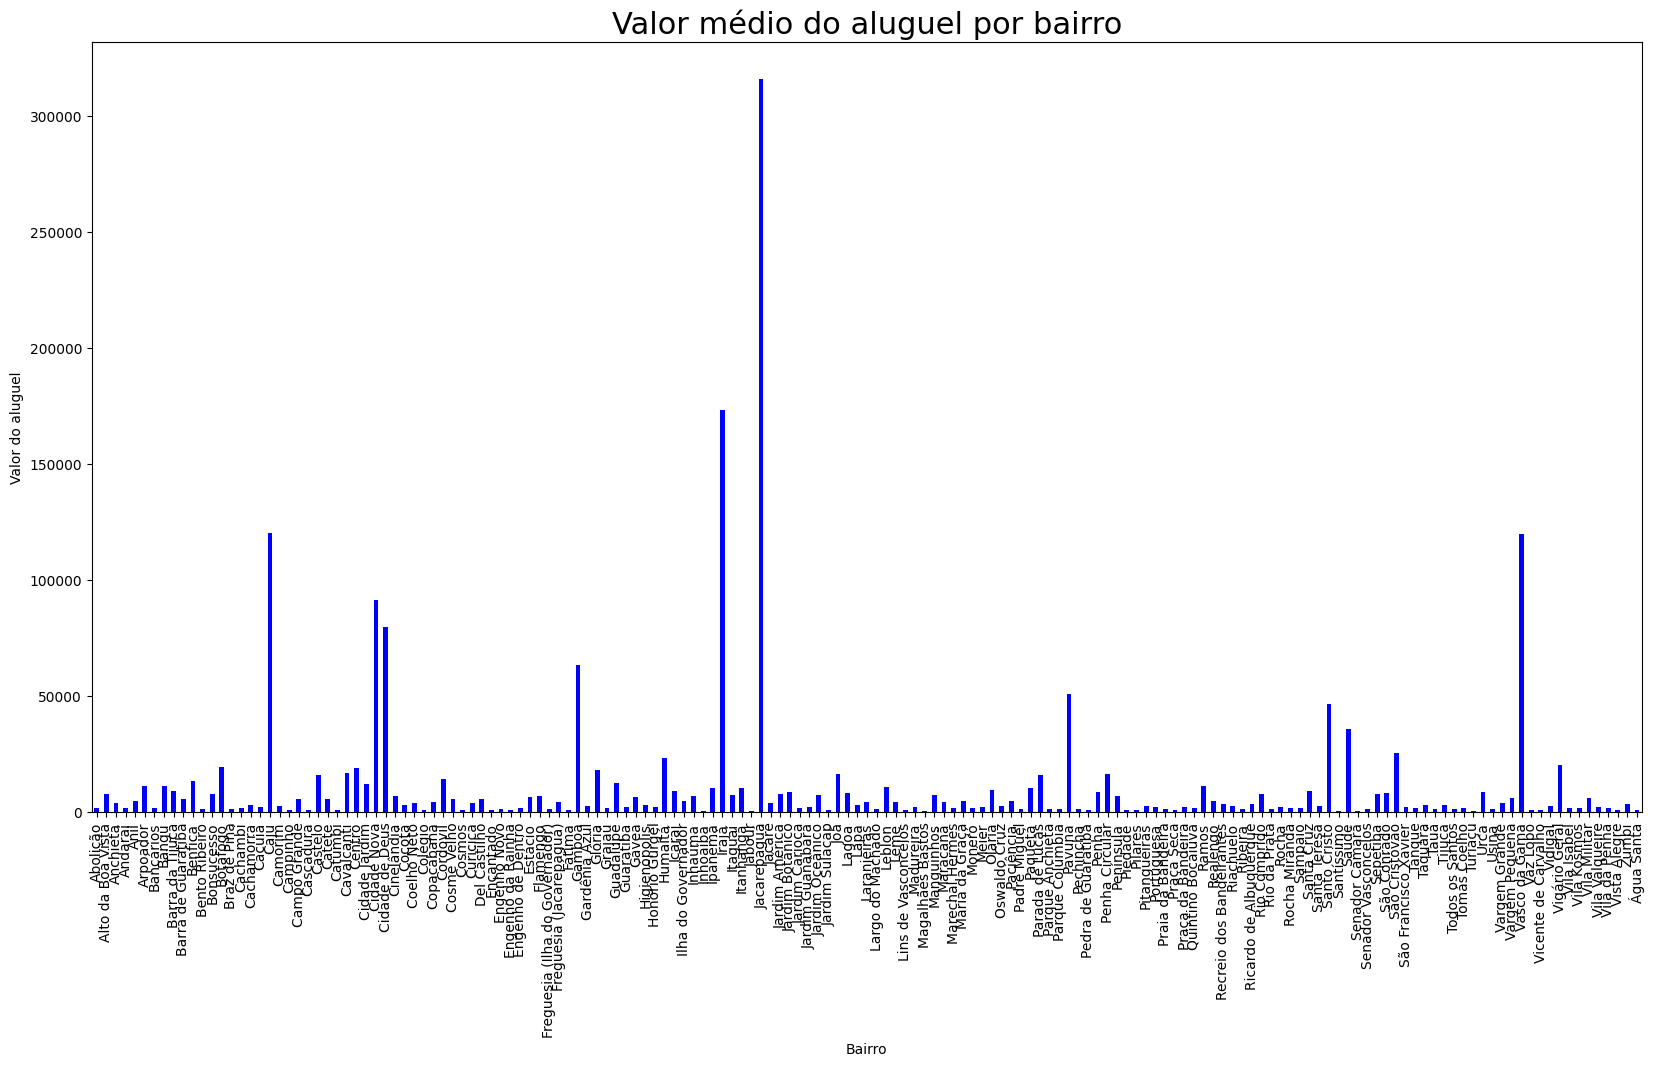

In [163]:
fig = grupo_bairros['Valor'].mean().plot.bar(color='blue')
fig.set_ylabel('Valor do aluguel')
fig.set_title('Valor médio do aluguel por bairro', {'fontsize': 22})

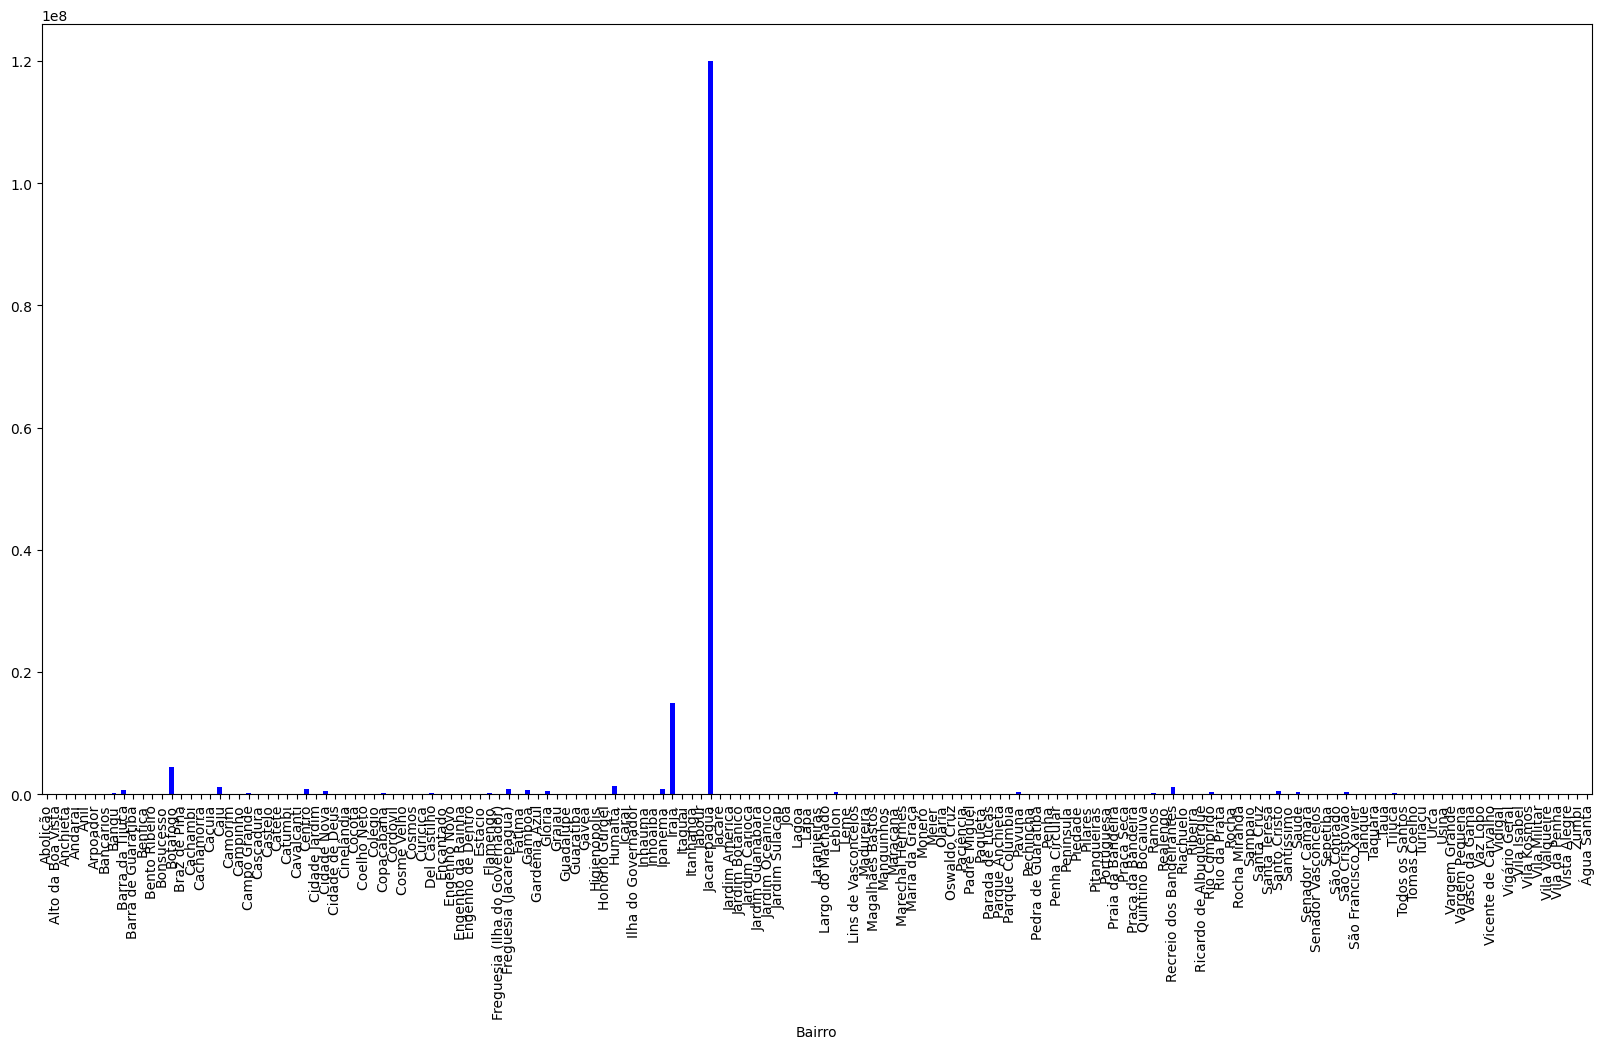

In [165]:
fig = grupo_bairros['Valor'].max().plot.bar(color='blue')
fig.set_ylabel('Valor do aluguel')
fig.set_title('Valor máximo do aluguel por bairro', {'fontsize': 22})

Text(0.5, 1.0, 'Valor máximo do condomínio por bairro')

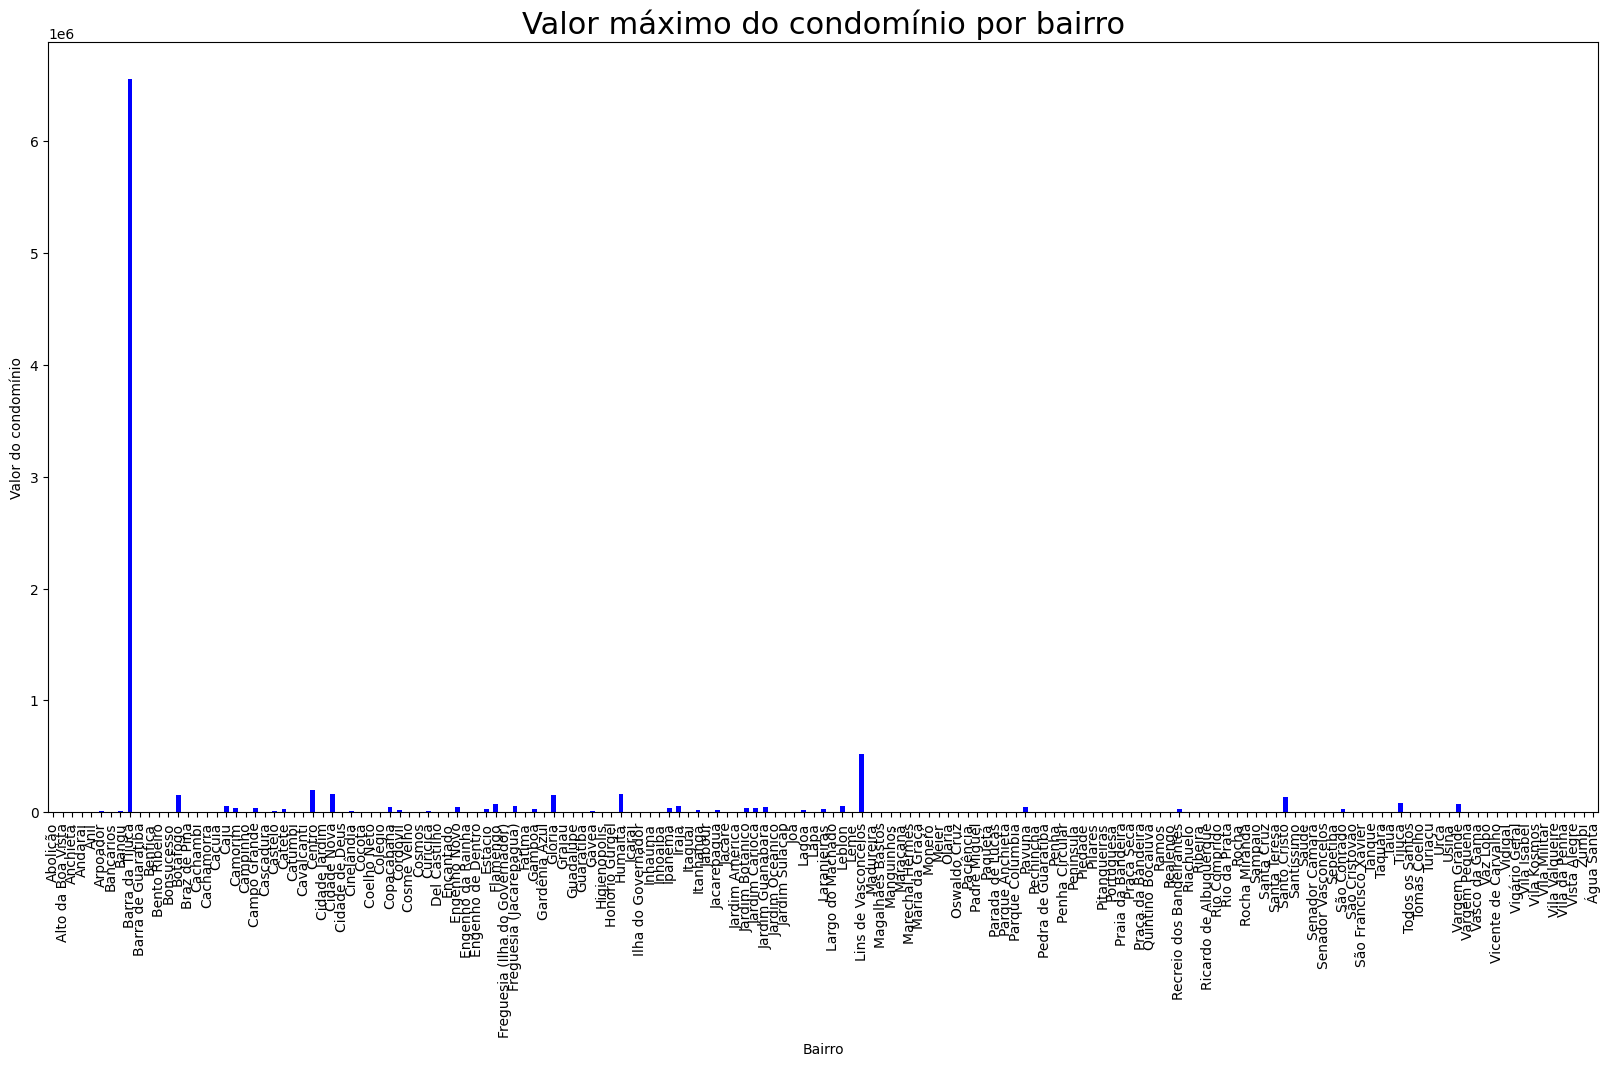

In [166]:
fig = grupo_bairros['Condominio'].max().plot.bar(color='blue')
fig.set_ylabel('Valor do condomínio')
fig.set_title('Valor máximo do condomínio por bairro', {'fontsize': 22})

Text(0.5, 1.0, 'Quantidade máxima de quartos por bairro')

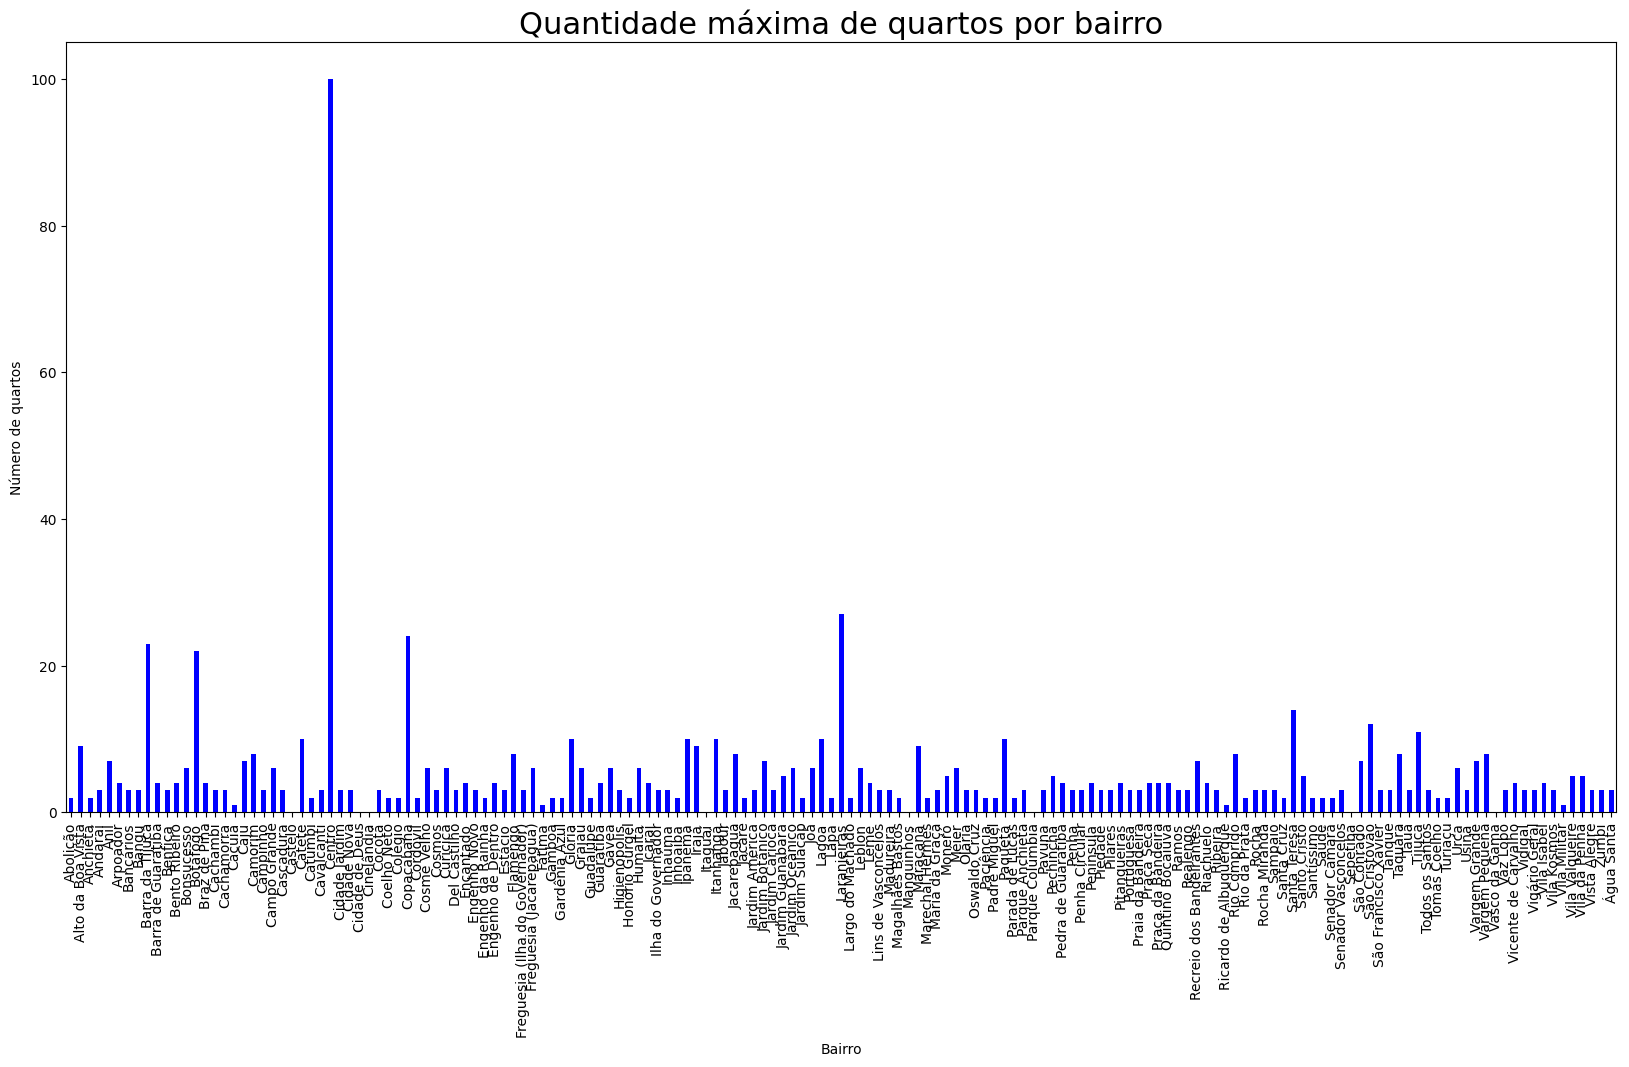

In [167]:
fig = grupo_bairros['Quartos'].max().plot.bar(color='blue')
fig.set_ylabel('Número de quartos')
fig.set_title('Quantidade máxima de quartos por bairro', {'fontsize': 22})

Text(0.5, 1.0, 'Valor máximo do IPTU por bairro')

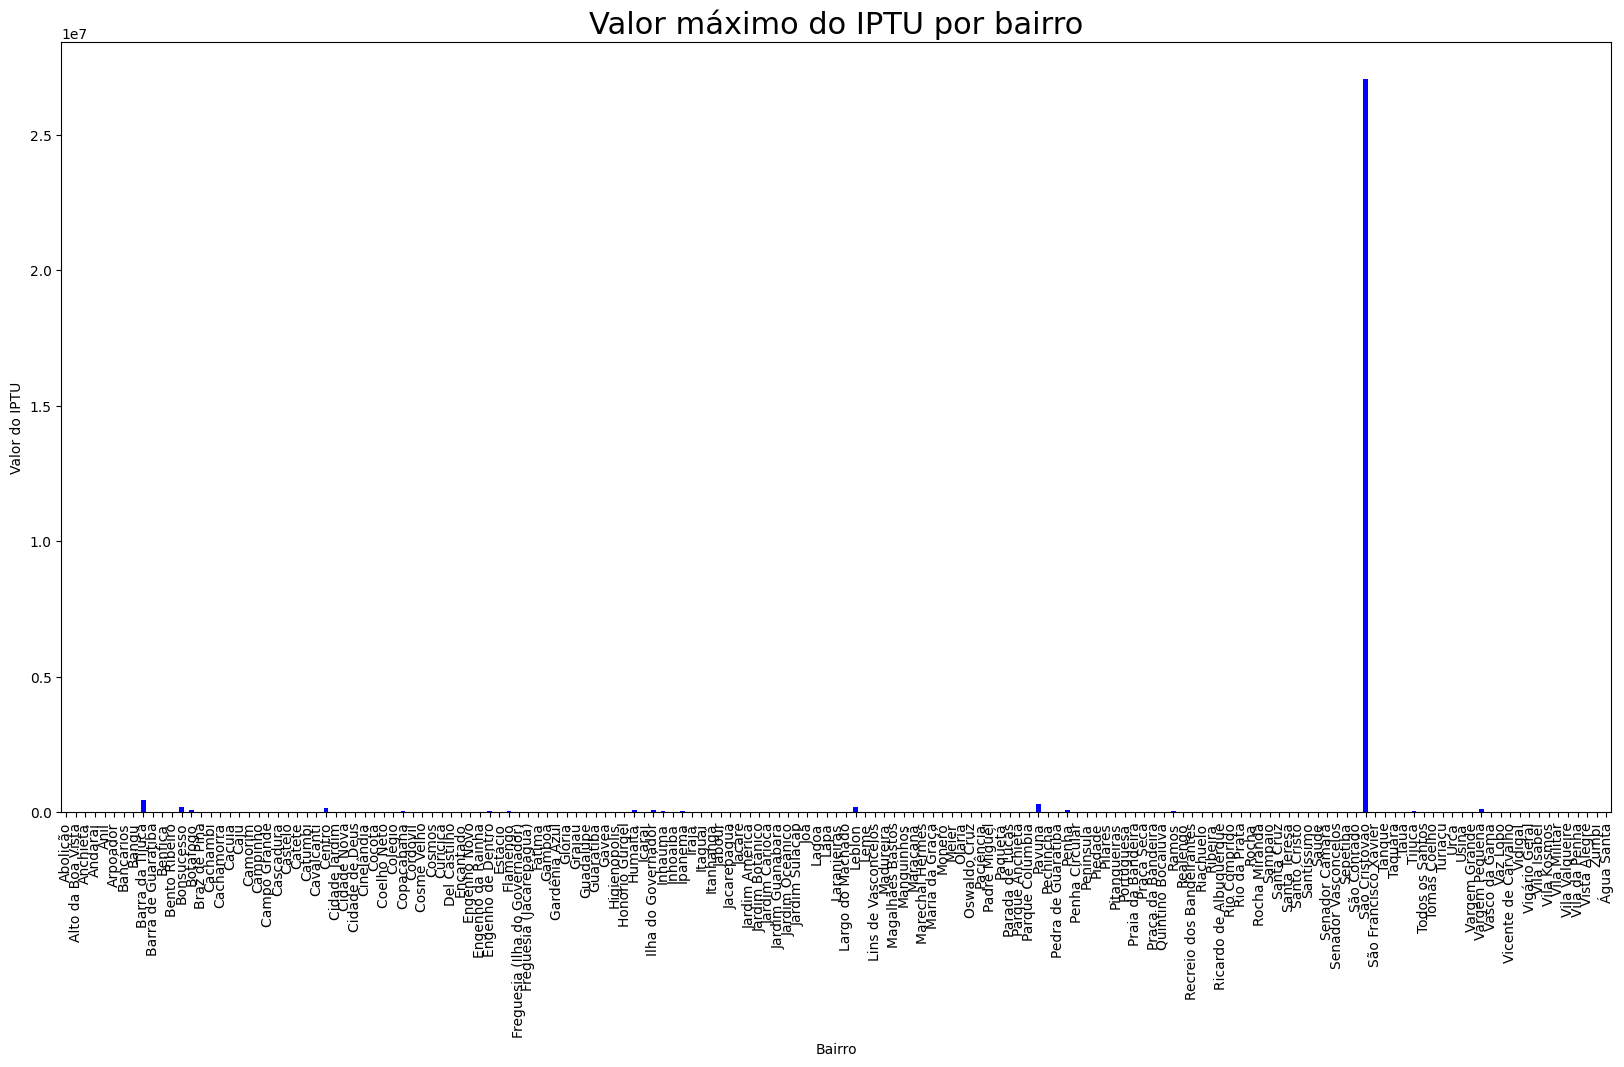

In [168]:
fig = grupo_bairros['IPTU'].max().plot.bar(color='blue')
fig.set_ylabel('Valor do IPTU')
fig.set_title('Valor máximo do IPTU por bairro', {'fontsize': 22})

# Relatório de análise VIII

## Identificando e removendo outliers

In [171]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (14, 6))

<Axes: >

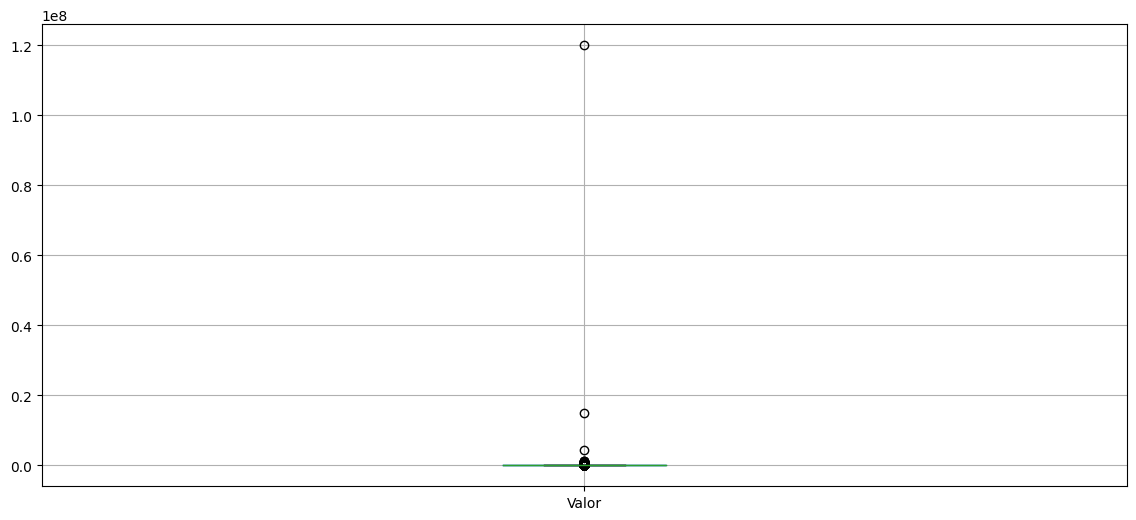

In [175]:
dados_brutos.boxplot(['Valor'])

In [182]:
dados_brutos[dados_brutos['Valor'] >= 50000]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 803 entries, 36 to 32135
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Tipo           803 non-null    object 
 1   Bairro         803 non-null    object 
 2   Quartos        803 non-null    int64  
 3   Vagas          803 non-null    int64  
 4   Suites         803 non-null    int64  
 5   Area           803 non-null    int64  
 6   Valor          803 non-null    float64
 7   Condominio     803 non-null    float64
 8   IPTU           803 non-null    float64
 9   Valor m2       803 non-null    float64
 10  Tipo Agregado  803 non-null    object 
dtypes: float64(4), int64(4), object(3)
memory usage: 75.3+ KB


In [185]:
valor = dados_brutos['Valor']
Q1 = valor.quantile(.25)
Q3 = valor.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [187]:
selecao = (dados_brutos['Valor'] >= limite_inferior) & (dados_brutos['Valor'] <= limite_superior)
dados_new = dados_brutos[selecao]
dados_new

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,70.00,Casa
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0,34.67,Apartamento
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
...,...,...,...,...,...,...,...,...,...,...,...
32193,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0,29.63,Apartamento
32194,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0,23.08,Apartamento
32195,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0,29.17,Apartamento
32196,Apartamento,Leblon,2,0,0,70,3000.0,760.0,0.0,42.86,Apartamento


<Axes: >

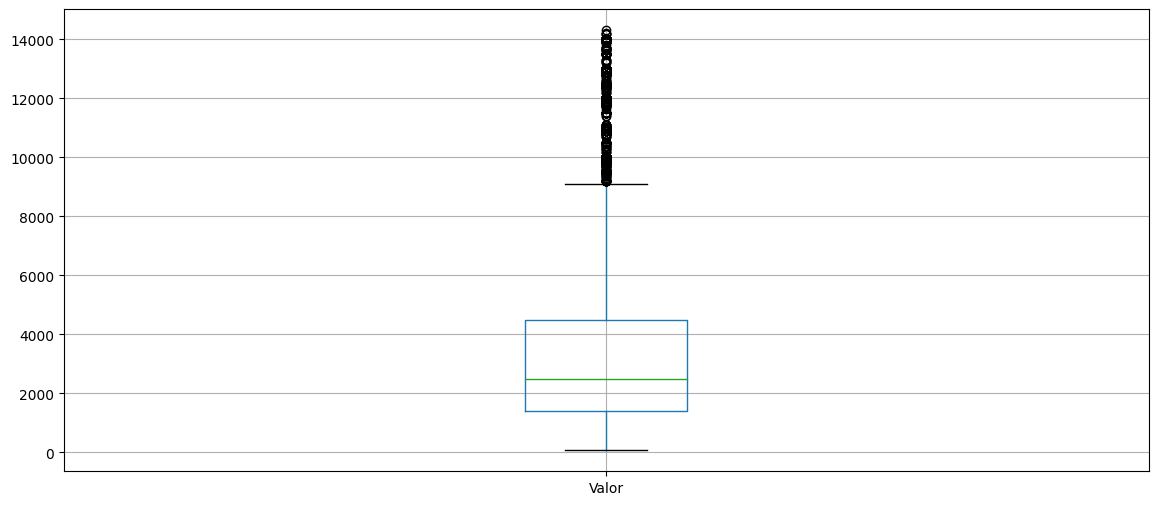

In [188]:
dados_new.boxplot(['Valor'])

array([[<Axes: title={'center': 'Valor'}>]], dtype=object)

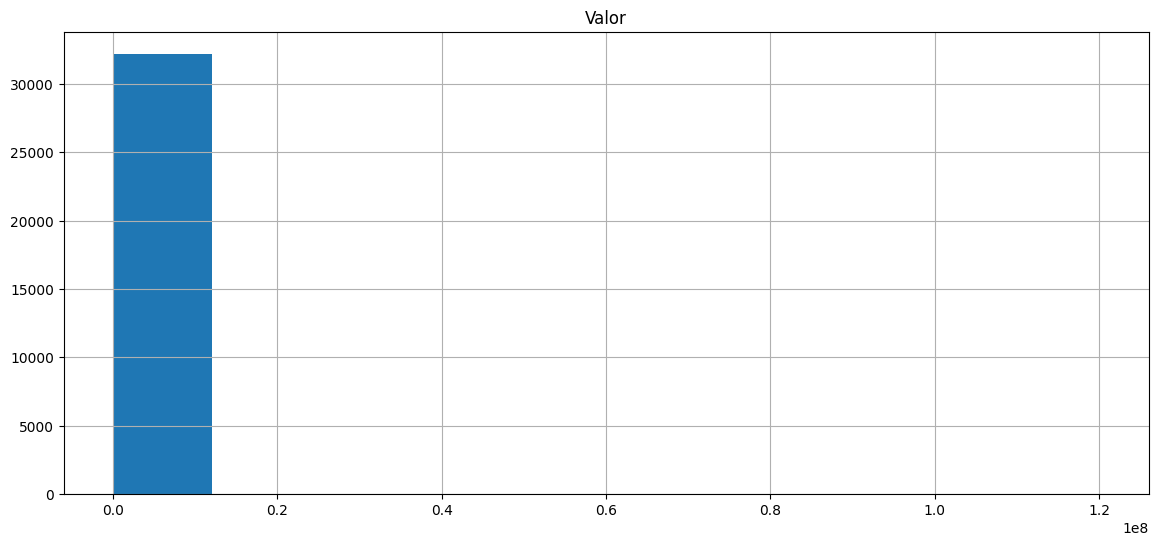

In [190]:
dados_brutos.hist(['Valor'])

array([[<Axes: title={'center': 'Valor'}>]], dtype=object)

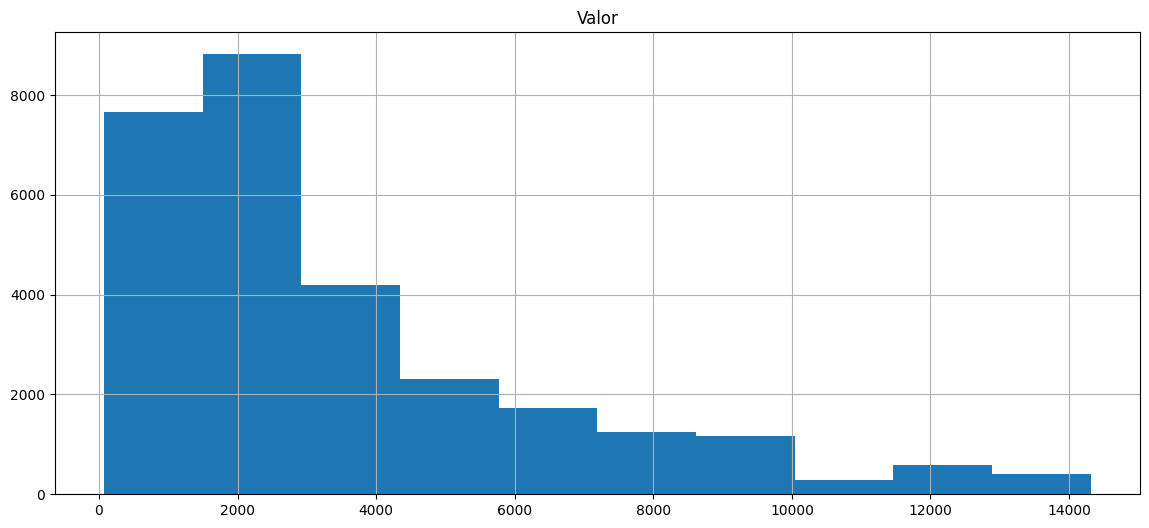

In [191]:
dados_new.hist(['Valor'])